In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

883536776.npz
(300, 64, 64, 3)


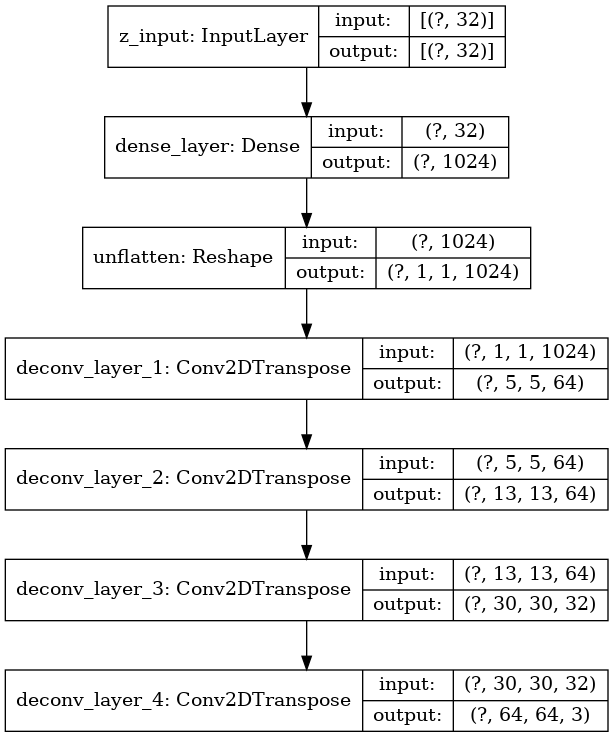

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

KeyboardInterrupt: 

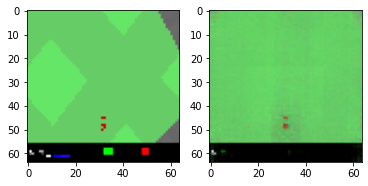

In [6]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

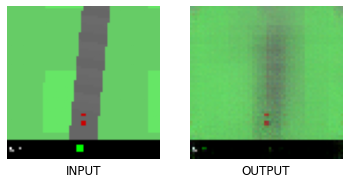

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.9811 -0.6151 -0.3204 -0.9384  0.9    -0.2413 -0.1377  1.2494  0.4542
 -0.8223 -0.6788 -0.8475 -0.5866 -0.1825 -1.3107  0.6066  0.2147 -0.0089
 -0.5033 -0.1205 -0.5053  0.3995  0.1766  0.5882  1.3998  1.21    0.1465
  1.1094  0.6533  0.3246  0.5091  0.3846]
log_var = [-0.688  -0.6565 -0.5617 -1.4178 -2.8283 -0.1454 -0.4481 -0.9821 -0.1253
 -0.2159 -0.0883 -0.0905 -1.1172  0.0891 -2.0133 -0.2391 -0.1033 -0.3674
 -0.1149 -0.3933 -1.6471 -0.2555 -0.0255 -0.3309 -1.9375 -0.4211 -0.1759
 -0.4129 -0.3314 -0.256  -0.1813 -0.1195]
z = [[ 0.9811 -0.6151 -0.3204 -0.9384  0.9    -0.2413 -0.1377  1.2494  0.4542
  -0.8223 -0.6788 -0.8475 -0.5866 -0.1825 -1.3107  0.6066  0.2147 -0.0089
  -0.5033 -0.1205 -0.5053  0.3995  0.1766  0.5882  1.3998  1.21    0.1465
   1.1094  0.6533  0.3246  0.5091  0.3846]]


informative dimensions:


array([ 0,  1,  2,  3,  4,  7, 12, 14, 20, 24])

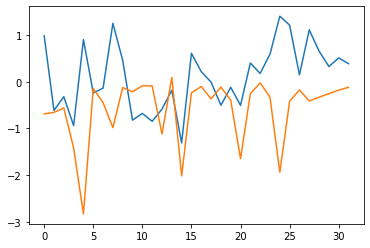

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [10]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [11]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.9854, -0.6174, -0.3326, -0.9124,  0.9254, -0.2094, -0.094 ,
          1.1951,  0.4489, -0.8199, -0.6865, -0.8597, -0.602 , -0.1863,
         -1.3002,  0.6022,  0.2073, -0.0018, -0.5223, -0.1473, -0.5138,
          0.4009,  0.1946,  0.5896,  1.4157,  1.2005,  0.1466,  1.0985,
          0.6368,  0.3668,  0.5236,  0.3799]], dtype=float32),
 array([[-0.705 , -0.6573, -0.558 , -1.41  , -2.8295, -0.1543, -0.4517,
         -0.9875, -0.1255, -0.217 , -0.0981, -0.1003, -1.1143,  0.0773,
         -2.0067, -0.2325, -0.0913, -0.3476, -0.1184, -0.374 , -1.6434,
         -0.2634, -0.0398, -0.3233, -1.9366, -0.4119, -0.1828, -0.4204,
         -0.3316, -0.2605, -0.1695, -0.1145]], dtype=float32),
 array([[ 0.6927,  0.8026,  0.1416, -1.0051,  0.7709,  0.429 , -0.8932,
          0.221 , -0.1369, -1.5881, -1.9694, -0.3388, -0.9565,  0.5496,
         -2.0952, -0.1768,  0.6198, -0.0309, -0.8863,  0.0029, -0.6752,
          1.3564,  0.0644,  1.6404,  1.413 ,  2.1113, -0.0201,  0.7567,
         -

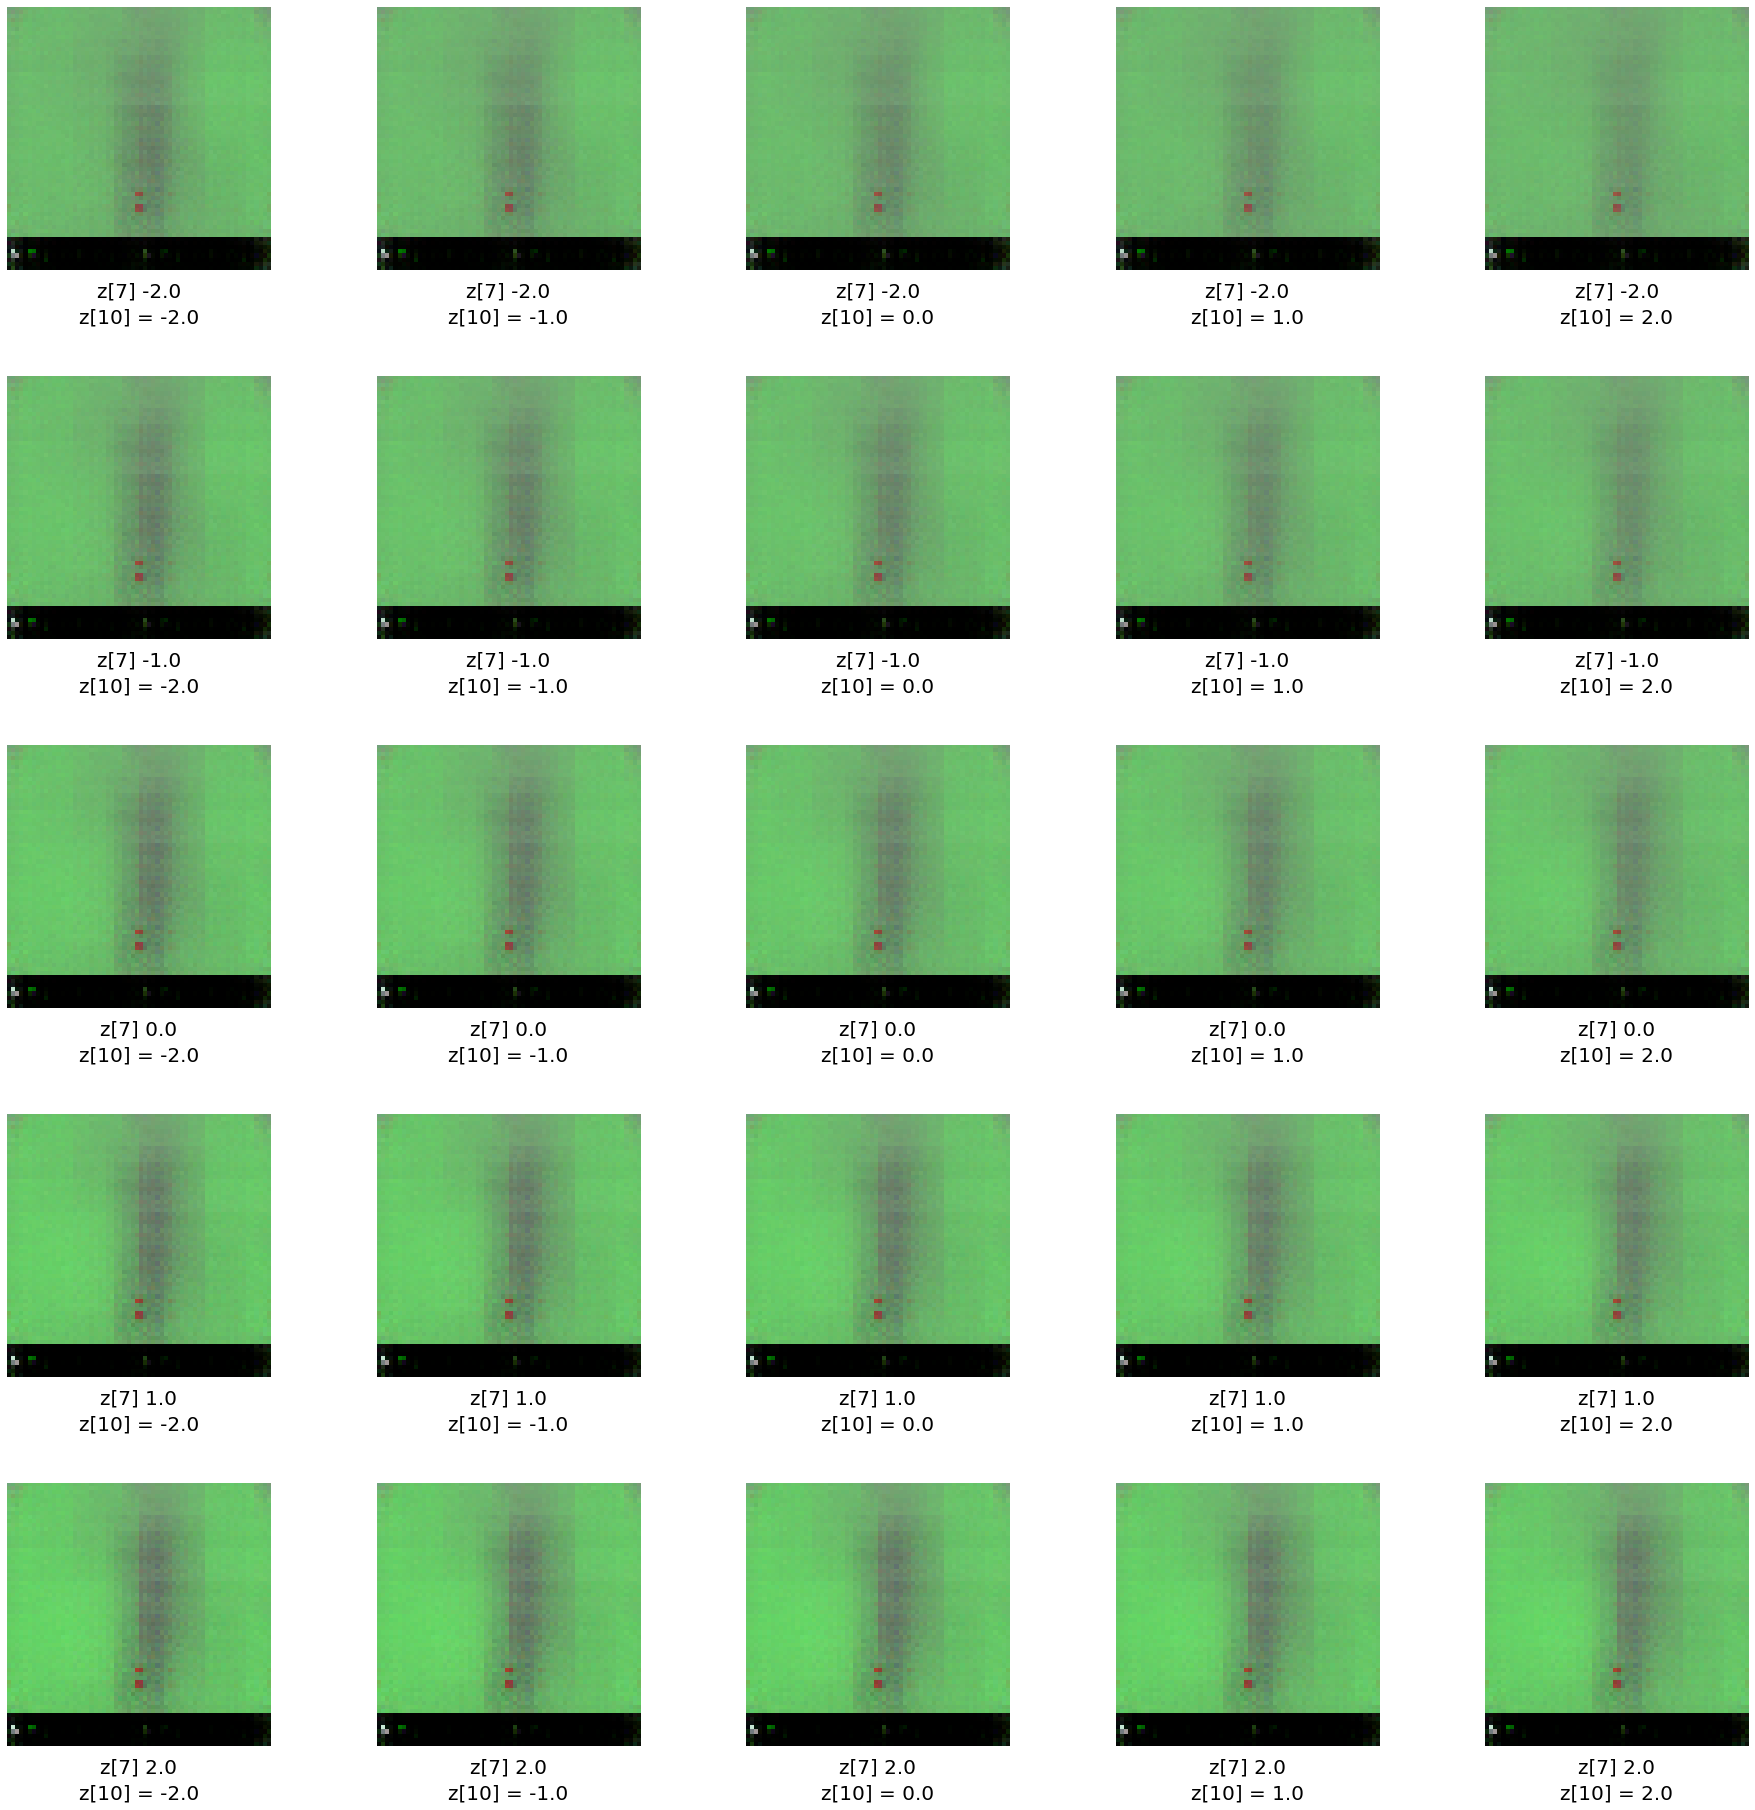

In [12]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [13]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [14]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=0.3769351840019226, description='z0', max=3.0, min=-3.0), FloatSlider(…

<function __main__.play_with_z(z0=0.37693518, z2=-0.45473528, z4=0.7128756, z5=-0.22231475, z6=-0.18751034, z7=1.0106817, z10=-0.25765345, z15=0.47741964, z24=1.1772373, z25=0.8360219, z27=0.70639825)>